# 0. Code Library and Links

In [1]:
import numpy as np 
import pandas as pd 
import scipy
import seaborn
import matplotlib.pylab as plt
from matplotlib import cm

%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
from sklearn import preprocessing

In [29]:
from sklearn.decomposition import PCA

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# 1. Data Samples

In [5]:
# external
boston = datasets.load_boston()
housing = datasets.fetch_california_housing()
digits = datasets.load_digits()

In [6]:
X1, y1 = boston.data, boston.target
X2, y2 = housing.data, housing.target
X3, y3 = digits.data, digits.target

In [7]:
# artificial
# 5000x3 - matrix, 2 - (responsible for targets) features, 1 - the target, 0.97 - the bias factor)
regression_data = datasets.make_regression(5000, 3, 2, 1, 0.97)
X4, y4 = regression_data[0], regression_data[1]

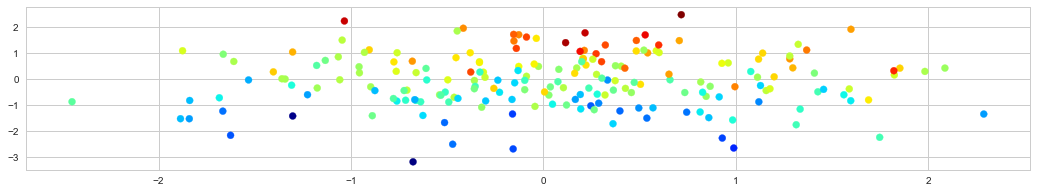

In [30]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18,3))
plt.scatter(X4[:200, 0], X4[:200, 1], c=y4[:200], cmap=cm.jet);

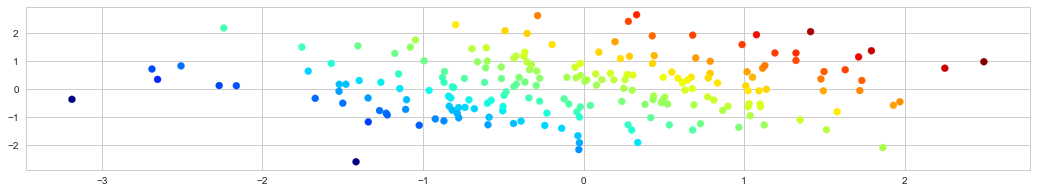

In [31]:
plt.figure(figsize=(18,3))
plt.scatter(X4[:200, 1], X4[:200, 2], c=y4[:200], cmap=cm.jet);

In [10]:
blobs_data = datasets.make_blobs(n_samples=1000, centers=[[1, 1], [-1, -1], [1, -1], [-1, 1]], cluster_std=0.5)
X5, y5 = blobs_data[0], blobs_data[1]

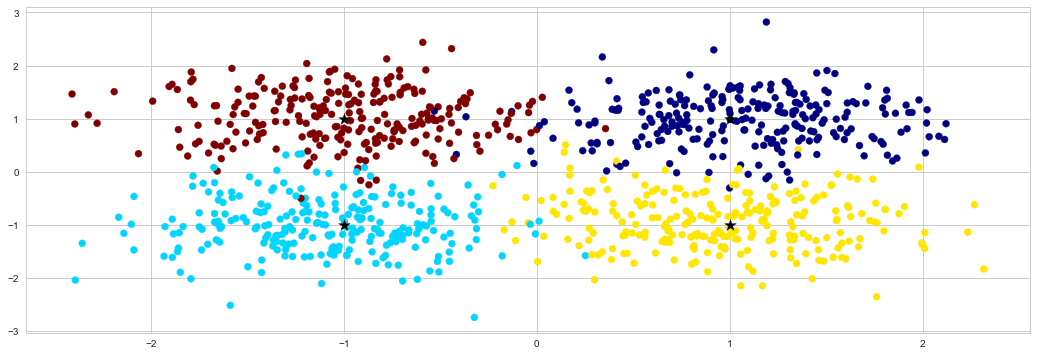

In [11]:
plt.figure(figsize=(18,6))
plt.scatter(X5[:, 0], X5[:, 1], c=y5, cmap=cm.jet)
plt.scatter([1,-1,1,-1], [1,-1,-1,1], c='black', marker='*', s=150);

In [12]:
classification_data = datasets.make_multilabel_classification(n_classes=3, n_samples=1000, n_features=2)
X6, y6 = classification_data[0], classification_data[1]

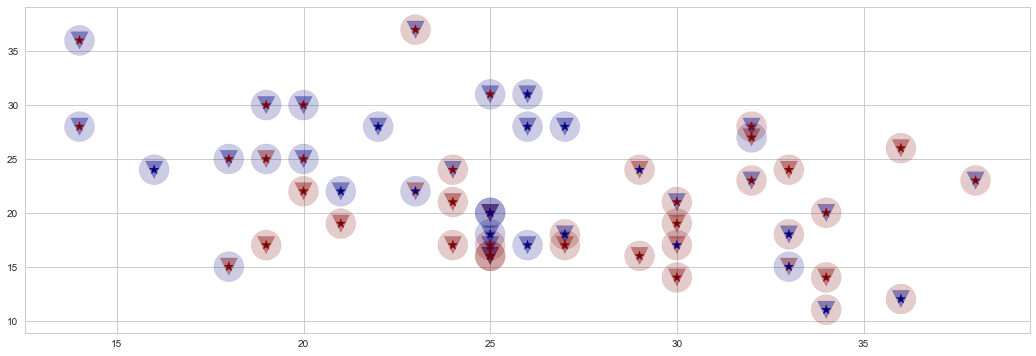

In [13]:
plt.figure(figsize=(18,6))
plt.scatter(X6[:50, 0], X6[:50, 1], c=y6[:50, 0], marker='o', alpha=0.2, cmap=cm.jet, s=900)
plt.scatter(X6[:50, 0], X6[:50, 1], c=y6[:50, 1], marker='v', alpha=0.4, cmap=cm.jet, s=300)
plt.scatter(X6[:50, 0], X6[:50, 1], c=y6[:50, 2], marker='*', cmap=cm.jet, s=100);

# 2. Extraction and Preprocessing

In [14]:
temperature = [{'city': 'Hanoi', 'temperature': 33.}, {'city': 'Frankfurt', 'temperature': 16.},
               {'city': 'Houston', 'temperature': 28.}, {'city': 'Riyadh', 'temperature': 38.},
               {'city': 'Barcelona', 'temperature': 17.}, {'city': 'Ankara', 'temperature': 27.}]

corpus = ['Have you already set your goals for the New Year?', 
          'Do you want to lose ten kilos, run a marathon or speak fluent English?', 
          'Some experts believe that you need systems, not goals.', 
          'A system is something you do on a regular basis. ',
          'This means focusing on what you can control (your actions) rather than what you can’t.',
          'For example, do not focus on losing ten kilos.',
          'Focus on shopping for healthy food and cooking something light every day.',
          'Do not focus on the marathon.',
          'Focus on the training schedule.',
          'Invent a system to improve your English, one step at a time.',
          'Good luck!']

In [18]:
# Extraction from dicts
d_vectorizer = DictVectorizer()
d_vectorizer.fit_transform(temperature).toarray()

array([[  0.,   0.,   0.,   1.,   0.,   0.,  33.],
       [  0.,   0.,   1.,   0.,   0.,   0.,  16.],
       [  0.,   0.,   0.,   0.,   1.,   0.,  28.],
       [  0.,   0.,   0.,   0.,   0.,   1.,  38.],
       [  0.,   1.,   0.,   0.,   0.,   0.,  17.],
       [  1.,   0.,   0.,   0.,   0.,   0.,  27.]])

In [21]:
print(d_vectorizer.get_feature_names())

['city=Ankara', 'city=Barcelona', 'city=Frankfurt', 'city=Hanoi', 'city=Houston', 'city=Riyadh', 'temperature']


In [16]:
# Extraction from texts
c_vectorizer = CountVectorizer(min_df=1)
X_corpus = c_vectorizer.fit_transform(corpus)
X_corpus

<11x65 sparse matrix of type '<class 'numpy.int64'>'
	with 96 stored elements in Compressed Sparse Row format>

In [23]:
print(c_vectorizer.get_feature_names())

['actions', 'already', 'and', 'at', 'basis', 'believe', 'can', 'control', 'cooking', 'day', 'do', 'english', 'every', 'example', 'experts', 'fluent', 'focus', 'focusing', 'food', 'for', 'goals', 'good', 'have', 'healthy', 'improve', 'invent', 'is', 'kilos', 'light', 'lose', 'losing', 'luck', 'marathon', 'means', 'need', 'new', 'not', 'on', 'one', 'or', 'rather', 'regular', 'run', 'schedule', 'set', 'shopping', 'some', 'something', 'speak', 'step', 'system', 'systems', 'ten', 'than', 'that', 'the', 'this', 'time', 'to', 'training', 'want', 'what', 'year', 'you', 'your']


In [28]:
c_analyzer = c_vectorizer.build_analyzer()
c_analyzer(corpus[7])

['do', 'not', 'focus', 'on', 'the', 'marathon']

In [27]:
X_corpus.toarray()[7] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

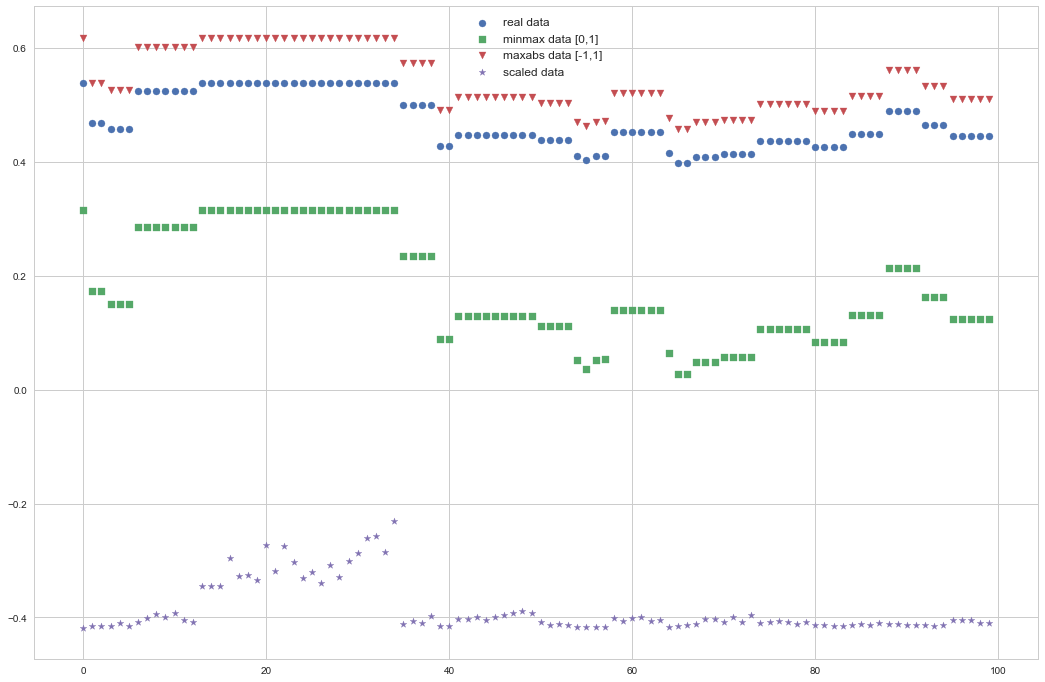

In [63]:
# Scaling features to a range
X1_scaled = preprocessing.scale(X1)
X1_minmax = preprocessing.MinMaxScaler().fit_transform(X1)
X1_maxabs = preprocessing.MaxAbsScaler().fit_transform(X1)

plt.figure(figsize=(18,12))
plt.scatter(range(100), X1[:100, 4], marker='o', label='real data')
plt.scatter(range(100), X1_minmax[:100, 4], marker='s', label='minmax data [0,1]')
plt.scatter(range(100), X1_maxabs[:100, 4], marker='v', label='maxabs data [-1,1]')
plt.scatter(range(100), X1_scaled[:100, 0], marker='*', label='scaled data')

plt.legend(fontsize=12);

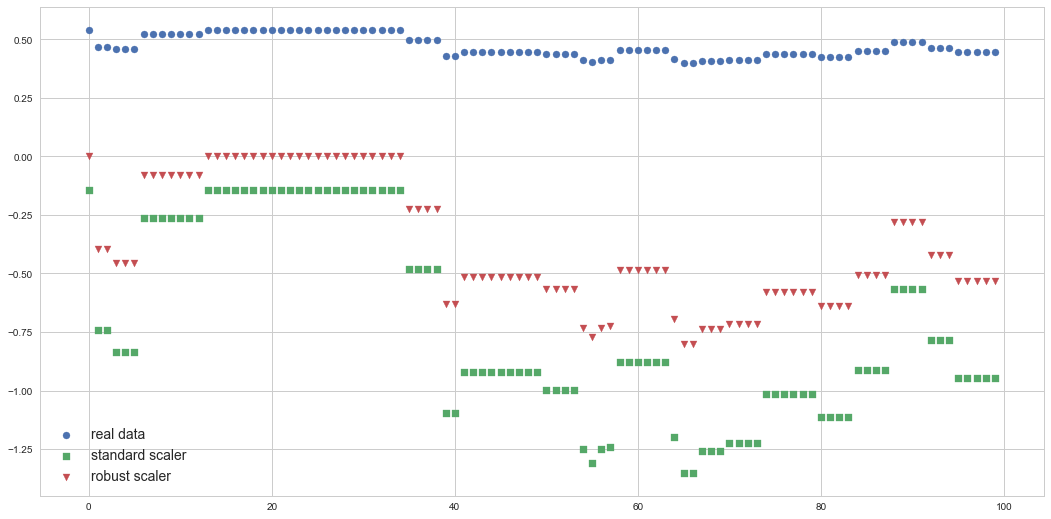

In [81]:
# StandardScaler, RobustScaler (data with outliers)
X1_stscaled = preprocessing.StandardScaler().fit_transform(X1)
X1_rbscaled = preprocessing.RobustScaler().fit_transform(X1)

plt.figure(figsize=(18,9))
plt.scatter(range(100), X1[:100, 4], marker='o', label='real data')
plt.scatter(range(100), X1_stscaled[:100, 4], marker='s', label='standard scaler')
plt.scatter(range(100), X1_rbscaled[:100, 4], marker='v', label='robust scaler')

plt.legend(fontsize=14);

In [88]:
# Encoding categorical features
print(y3[:3])
encoder = preprocessing.OneHotEncoder()
encoder.fit(y3.reshape(y3.shape[0], 1))
y3_cat = encoder.transform(y3.reshape(y3.shape[0], 1)).toarray()
print(y3_cat[:3])

[0 1 2]
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]


In [134]:
# Imputation of missing values
x1_train = [[0, 17], [np.nan, 4], [1, 7], [3, np.nan], [10, 25]]
x1_test = [[np.nan, 5], [8, np.nan], [4, 6]]

# mean
mean_imputer = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
mean_imputer.fit(x1_train)
mean_imputer.transform(x1_test)

array([[  3.5 ,   5.  ],
       [  8.  ,  13.25],
       [  4.  ,   6.  ]])

In [135]:
# median
median_imputer = preprocessing.Imputer(missing_values='NaN', strategy='median', axis=0)
median_imputer.fit(x1_train)
median_imputer.transform(x1_test)

array([[  2.,   5.],
       [  8.,  12.],
       [  4.,   6.]])

In [136]:
# Custom transformers
log_transformer = preprocessing.FunctionTransformer(np.log1p)
x1_log = log_transformer.transform(median_imputer.transform(x1_test))
x1_log

array([[ 1.09861229,  1.79175947],
       [ 2.19722458,  2.56494936],
       [ 1.60943791,  1.94591015]])

# 3. Supervised learning

## 3.1 Regression

## 3.2. Classification

# 4. Unsupervised learning